# 2.2 실습 - 붓꽃 데이터 분류

붓꽃의 품종을 분류하는 문제를 머신러닝 알고리즘으로 어떻게 해결하는지 살펴봅니다.

* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

## 2.2.1 문제 정의

In [1]:
# 패키지 로딩
# 사이킷런 패키지 
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로딩
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
iris_df['label'] = sy
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# 데이터프레임의 요약 정보
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   label              150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


- 데이터는 총 150개의 로우로 구성되어있으며, 컬럼은 5개가 존재한다.
- 각 컬럼의 결측치는 존재하지 않는다.

- sepal length : 꽃받침의 길이
- sepal width : 꽃받침의 너비
- petal length : 꽃잎의 길이
- petal width : 꽃잎의 너비
- label : 품종

In [8]:
# 데이터프레임의 통계 정보 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# 품종(label) 카테고리 확인
# 범주형 데이터 이기 때문에 분류 문제로 정의 
iris_df['label'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

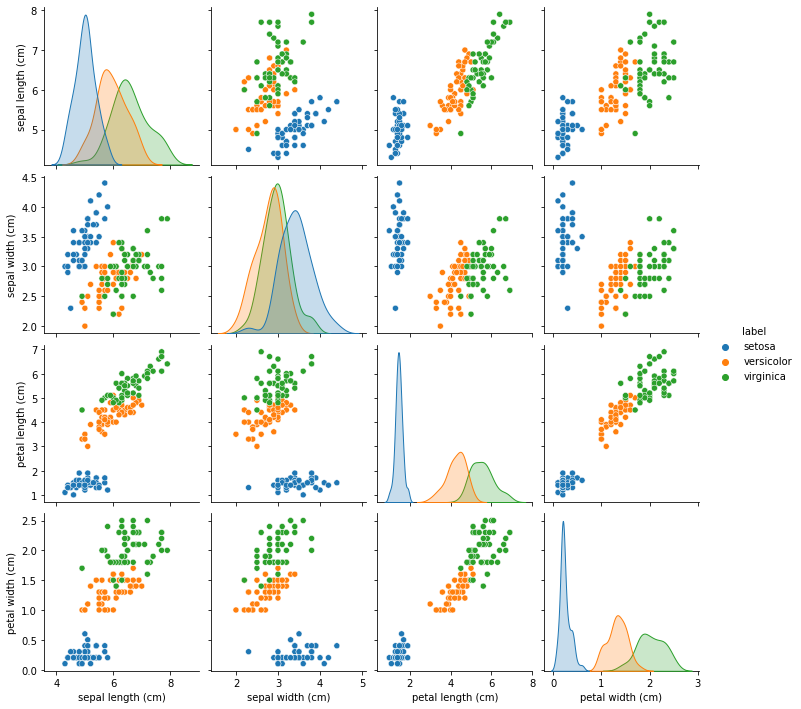

In [10]:
# iris 데이터의 pairplot
# 모든 변수에 대한 산점도 그래프 
# 0번 품종이 전반적으로 피쳐의 값이 작은 품종
# 2로 갈수록 피쳐의 값이 큰 품종
sns.pairplot(iris_df, hue='label')

## 2.2.2.데이터 정제

In [11]:
# 결측치 확인
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [12]:
# 중복값 여부 확인
iris_df.duplicated().sum()

1

In [13]:
# 중복값 확인
# 142번째 위치한 2번 품종의 값이 중복 값 
iris_df[iris_df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
142,5.8,2.7,5.1,1.9,virginica


In [14]:
# 중복값 제거 ( 첫번째 값을 남기고 나머지는 제거 )
# inplace=True : 결과값을 바로 df 에 반영
iris_df.drop_duplicates(keep='first', inplace=True)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  149 non-null    float64 
 1   sepal width (cm)   149 non-null    float64 
 2   petal length (cm)  149 non-null    float64 
 3   petal width (cm)   149 non-null    float64 
 4   label              149 non-null    category
dtypes: category(1), float64(4)
memory usage: 6.1 KB


In [15]:
# 결측치/중복값 제거로 전처리 완료 
# 데이터분할 ( 독립변수x, 종속변수y 분할 )
X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
# randon_state : 데이터 분할 위한 랜덤 시드 / 같은 기준으로 분류를 해야 하기 때문에 동일한 랜덤값으로 ~ 
# stratify : 계층화 방식으로 분할할 경우 참조 대상 ( 범주형 데이터 분류에서 쏠리지 않게 하기 위해 )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
print("학습용 데이터 수:{0}, 테스트용 데이터 수: {1}".format(len(X_train), len(X_test)))

학습용 데이터 수:111, 테스트용 데이터 수: 38


In [17]:
# DecisionTreeClassifier 객체 생성 
model = DecisionTreeClassifier(random_state=42)
# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 2.2.3.학습-의사결정나무

In [19]:
!pip install graphviz

In [20]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 의사결정나무 모델을 dot 파일로 추출
export_graphviz(model, out_file='tree.dot')

# dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# png 출력
Image(filename = 'tree.png')

# x[2] 꽃잎길이 의 값이 2.45 보다 크면 False, 같거나 작으면 True 
# 샘플 수를 쪼개 가면서 분기 
# gini 지수가 0 이면 불순도가 0 이므로 더이상 분기 없음
# 모든 노드가 gini 지수 0 이 될 때까지 분기 

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

## 2.2.4 평가

In [ ]:
#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
score

# 89% 의 정확도 

## 2.2.5 예측

In [ ]:
# 학습이 완료된 데이터는 각 샘플에 대해 예측값을 확인할 수 있다.

import numpy as np
new = np.array([[5.4, 4, 1.5, 0.2]])
y_pred = model.predict(new)
y_pred

## 전체 소스코드

In [ ]:
# 패키지 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터 로딩
iris = load_iris()

# 로딩한 데이터를 데이터 프레임으로 생성
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

# 중복값 제거
iris_df.drop_duplicates(keep='first', inplace=True)

# 데이터분할
X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print("학습용 데이터 수:{0}, 테스트용 데이터 수: {1}".format(len(X_train), len(X_test)))

# DecisionTreeClassifier 객체 생성 
model = DecisionTreeClassifier(random_state=42)
# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)


#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
print("테스트셋의 정확도:{:.2f}".format(score))

# 신규 값 예측
new = np.array([[5.4, 4, 1.5, 0.2]])
y_pred = model.predict(new)
print("예측결과:{}".format(y_pred))